In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

### Wczytanie danych + podział

In [104]:
data = pd.read_csv('../Data/movie_statistic_dataset.csv')

In [105]:
our_data, validator_data = train_test_split(data, test_size = 0.2, random_state = 42)
our_data.to_csv('../Data/our_data.csv', index = False)
validator_data.to_csv('../Data/validator_data.csv', index = False)


X = our_data

X_train, X_val = train_test_split(
    X, test_size=0.2, random_state=42 #stratify mażnaby dodać ale wiem po jakiej kolumnie
)
X_val, X_test = train_test_split(
    X_val, test_size=0.3, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

print(our_data.shape, validator_data.shape)

(2803, 14) (490, 14) (211, 14)
(3504, 14) (876, 14)


jednak chyba nie trzeba dzielić naszych danych na walidacyjny i testowy ale idk

## EDA

In [106]:
df = pd.read_csv('../Data/our_data.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           3504 non-null   object 
 1   production_date       3504 non-null   object 
 2   genres                3504 non-null   object 
 3   runtime_minutes       3504 non-null   float64
 4   director_name         3504 non-null   object 
 5   director_professions  3504 non-null   object 
 6   director_birthYear    3504 non-null   object 
 7   director_deathYear    3504 non-null   object 
 8   movie_averageRating   3504 non-null   float64
 9   movie_numerOfVotes    3504 non-null   float64
 10  approval_Index        3504 non-null   float64
 11  Production budget $   3504 non-null   int64  
 12  Domestic gross $      3504 non-null   int64  
 13  Worldwide gross $     3504 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 383.4+ KB


### Opisy kolumn:
- Movie_title
- Production_date
- Genres
- Runtime_minutes
- Director_name (primaryName)
- Director_professions (primaryProfession)
- Director_birthYear
- Director_deathYear
- Movie_averageRating : refers to the average rating given by online users for particular movie
- Movie_numberOfVotes : refers to the number of votes given by online users for a particular movie
- Approval_Index :is a normalized indicator (on scale 0-10) calculated by multiplying the logarithm of the number of votes by the average users rating. It provides a concise measure of a movie's overall popularity and approval among online viewers, penalizing both films that got too few reviews and blockbusters that got too many.
- Production_budget ( $)
- Domestic_gross ($)
- Worldwide_gross ($)

nie ma wartości null, fajnie

In [108]:
df.head(20)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,50000000,75624550,118729073
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,14000000,46800000,185400000
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,9500000,57176582,59675307
5,Melancholia,2011-11-11,"Drama,Sci-Fi",135.0,Lars von Trier,"writer,director,producer",1956,alive,7.1,185676.0,6.205598,9400000,3030848,21817298
6,The Kite Runner,2007-12-14,Drama,128.0,Marc Forster,"producer,director,writer",1969,alive,7.6,80886.0,6.187246,20000000,15800078,74180745
7,Noah,2014-03-27,"Action,Adventure,Drama",138.0,Darren Aronofsky,"producer,writer,director",1969,alive,5.8,257429.0,5.184656,130000000,101200044,352831065
8,Overboard,2018-05-04,"Comedy,Romance",112.0,Rob Greenberg,"producer,director,writer",\N,alive,6.0,39291.0,4.538167,12000000,50316123,91244913
9,The Girl Next Door,2004-04-09,"Comedy,Drama,Romance",109.0,Luke Greenfield,"director,producer,writer",1972,alive,6.7,227685.0,5.949102,25000000,14589444,31635150


### obserwacje:
- kolumny "genres","director_professions": zawierają po kilka wartości, dobrze by było rozdzielić jakoś 
- są wartości brakujące w postaci "-", "\N" w niektórych kolumnach zwłaszcza nienumerycznych (do sprawdzenia dokładniej ile itd.)
### POMYSŁ:
- user podaje jakiś film dostępny w ramce danych
- model wyrzuca mu jakieś 3-5 rekomendowanych filmów z ramki
- będą klastry wtedy i ma to potencjał
- ten sam film może być polecany przez to, że jest w nim kilka różnych gatunków = utworzyłbym wiersze z nowymi obserwacjami:
ten sam film będzie miał kilka wierszy ze względu na gatunek, ryzyko: model będzie miał fałszywe dane, ale jest max po 3 gatunki na film i wiekszosc paradoksalnie ma po 3, więc będzie w miare równo
- szczegółowe info o reżyserze jest skipowalne
- ważne kolumny: tytuł, data (rozdzieliłem już, najprawdopodobnij trzeba by zawezic do pólrocza kiedy film powstał), gatunek, runtime, reżyser (o ile jest, jak nie to other), ocena
- idk: budzety, któe brać itd, które indexy do oceny, ilość votów

Sprawdzenie czy nie ma duplikatów:

In [109]:
#Check movie titles for duplicates
print(df['movie_title'].value_counts().head(20))

#Check in data if there are any movies with the same title
df[df['movie_title'] == 'Brothers'].head()


Brothers               3
Halloween              3
Hercules               3
The Visit              3
Weekend                3
Redemption             3
The Addams Family      2
Malevolence            2
Life of the Party      2
An Ideal Husband       2
Conan the Barbarian    2
Breakthrough           2
West Side Story        2
The Jungle Book        2
The Omen               2
The Promise            2
Upside Down            2
Babylon                2
The Great Wall         2
Cinderella             2
Name: movie_title, dtype: int64


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
2930,Brothers,2015-08-13,"Action,Drama,Sport",156.0,Karan Malhotra,"assistant_director,director,writer",\N,alive,6.4,13327.0,4.340382,13000000,656688,17856688
3106,Brothers,2015-08-13,Documentary,100.0,Aslaug Holm,"director,cinematographer,editor",\N,alive,7.6,371.0,3.176338,13000000,656688,17856688
3295,Brothers,2015-08-13,Documentary,68.0,Wojciech Staron,"cinematographer,camera_department,miscellaneous",1973,alive,7.4,81.0,2.260754,13000000,656688,17856688


Wydaje się  że 'Brothers' to ten sam film, więc albo trzeba wybrać jeden a resztę wywalić, albo tam gdzie się różnią (np. movie_averageRating) zrobić średnią, uwaga: nie wszystkie powtarzające się tytuły wskazują na ten sam film (np. Halloween to 3 różne filmy o tej samej nazwie)

In [127]:
df[df['movie_title'].str.contains('Alvin')].head()

,movie_title,runtime_minutes,director_name,director_birthYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,...,Romance,Sci-Fi,Sport,Thriller,War,Western,number_of_professions,production_year,production_month,production_day
27,Alvin and the Chipmunks: The Squeakquel,88.0,Betty Thomas,1947,4.5,50525.0,3.453928,70000000,219614612,443483213,...,0,0,0,0,0,0,3,2009,12,23
505,Alvin and the Chipmunks: Chipwrecked,87.0,Mike Mitchell,1970,4.3,36528.0,3.191933,80000000,133107389,349088523,...,0,0,0,0,0,0,3,2011,12,14
961,Alvin and the Chipmunks,92.0,Tim Hill,1958,5.2,88062.0,4.224269,55000000,217326974,362605033,...,0,0,0,0,0,0,3,2007,12,14
2876,Alvin and the Chipmunks: The Road Chip,92.0,Walt Becker,1968,4.9,20484.0,3.447177,90000000,85886987,249517956,...,0,0,0,0,0,0,3,2015,12,18


In [128]:
df[df['movie_title'].str.contains('Twilight')].head()

,movie_title,runtime_minutes,director_name,director_birthYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,...,Romance,Sci-Fi,Sport,Thriller,War,Western,number_of_professions,production_year,production_month,production_day
12,The Twilight Saga: Eclipse,124.0,David Slade,1969,5.0,249281.0,4.439516,68000000,300531751,706102828,...,0,0,0,0,0,0,3,2010,6,30
1697,Twilight Zone: The Movie,101.0,-,-,6.4,38741.0,4.842862,10000000,29500000,29500000,...,0,1,0,0,0,0,1,1983,6,24
3425,Twilight,122.0,Catherine Hardwicke,1955,5.3,466675.0,4.958314,37000000,192769854,402278564,...,1,0,0,0,0,0,3,2008,11,21


Mamy w danych filmy gdzie jest po kilka części, fajnie by było to jakoś zaznaczyć ale nie wiem jak. W Alvinie fajnie można zauważyć że w kolejnych filmach average rating spada, dopiero w ostatnim (2015) się podnosi, w kolejnej części Twilight też

### to do:
- rozdzielić wartości w genres i director professions jakoś lub zmodyfikować, date produkcji jakoś rozdzielić
- można zrobić kilka countplotów z podziałem na różne genres albo np. rok produkcji
- sprawdzić rozkłady zmiennych numerycznych (podzielić w ogóle jakoś kategoryczne od numerycznych i osobno analizować) 
- macierz korelacji dla zmiennych numerycznych
- sprawdzic brakujące wartości
- sprawdzić ile z filmów to jakieś franchises (Piraci z Karaibów, Avengers itd.)?

In [110]:
#check how many "-" or "\N" values in each column
print('wartości brakujące w postaci "-":')
for col in df.columns:
    if df[col][df[col] == '-'].count() > 0:
        print(col, df[col][df[col] == '-'].count())

print('\nwartości brakujące w postaci "\\N":')
for col in df.columns:
     if df[col][df[col] == '\\N'].count() > 0:
        print(col, df[col][df[col] == '\\N'].count())

print('\nliczba żywych rezyserów:')
for col in df.columns:
     if df[col][df[col] == "alive"].count() > 0:
        print(col, df[col][df[col] == 'alive'].count())

wartości brakujące w postaci "-":
director_name 265
director_professions 270
director_birthYear 265
director_deathYear 265

wartości brakujące w postaci "\N":
director_birthYear 468

liczba żywych rezyserów:
director_deathYear 2899


uwaga: brakujące wartości w postaci "-" występują zazwyczaj razem gdy nie jest podany reżyser, duża częśc reżyserów żyje, ale są to informacje raczej zbyteczna

In [111]:
#PODZIAŁ NA KOLUMNY Z DANYMI KATEGORYCZNYMI I NUMERYCZNYMI
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(exclude=['object']).columns

print(cat_columns)
print(num_columns)

Index(['movie_title', 'production_date', 'genres', 'director_name',
       'director_professions', 'director_birthYear', 'director_deathYear'],
      dtype='object')
Index(['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')


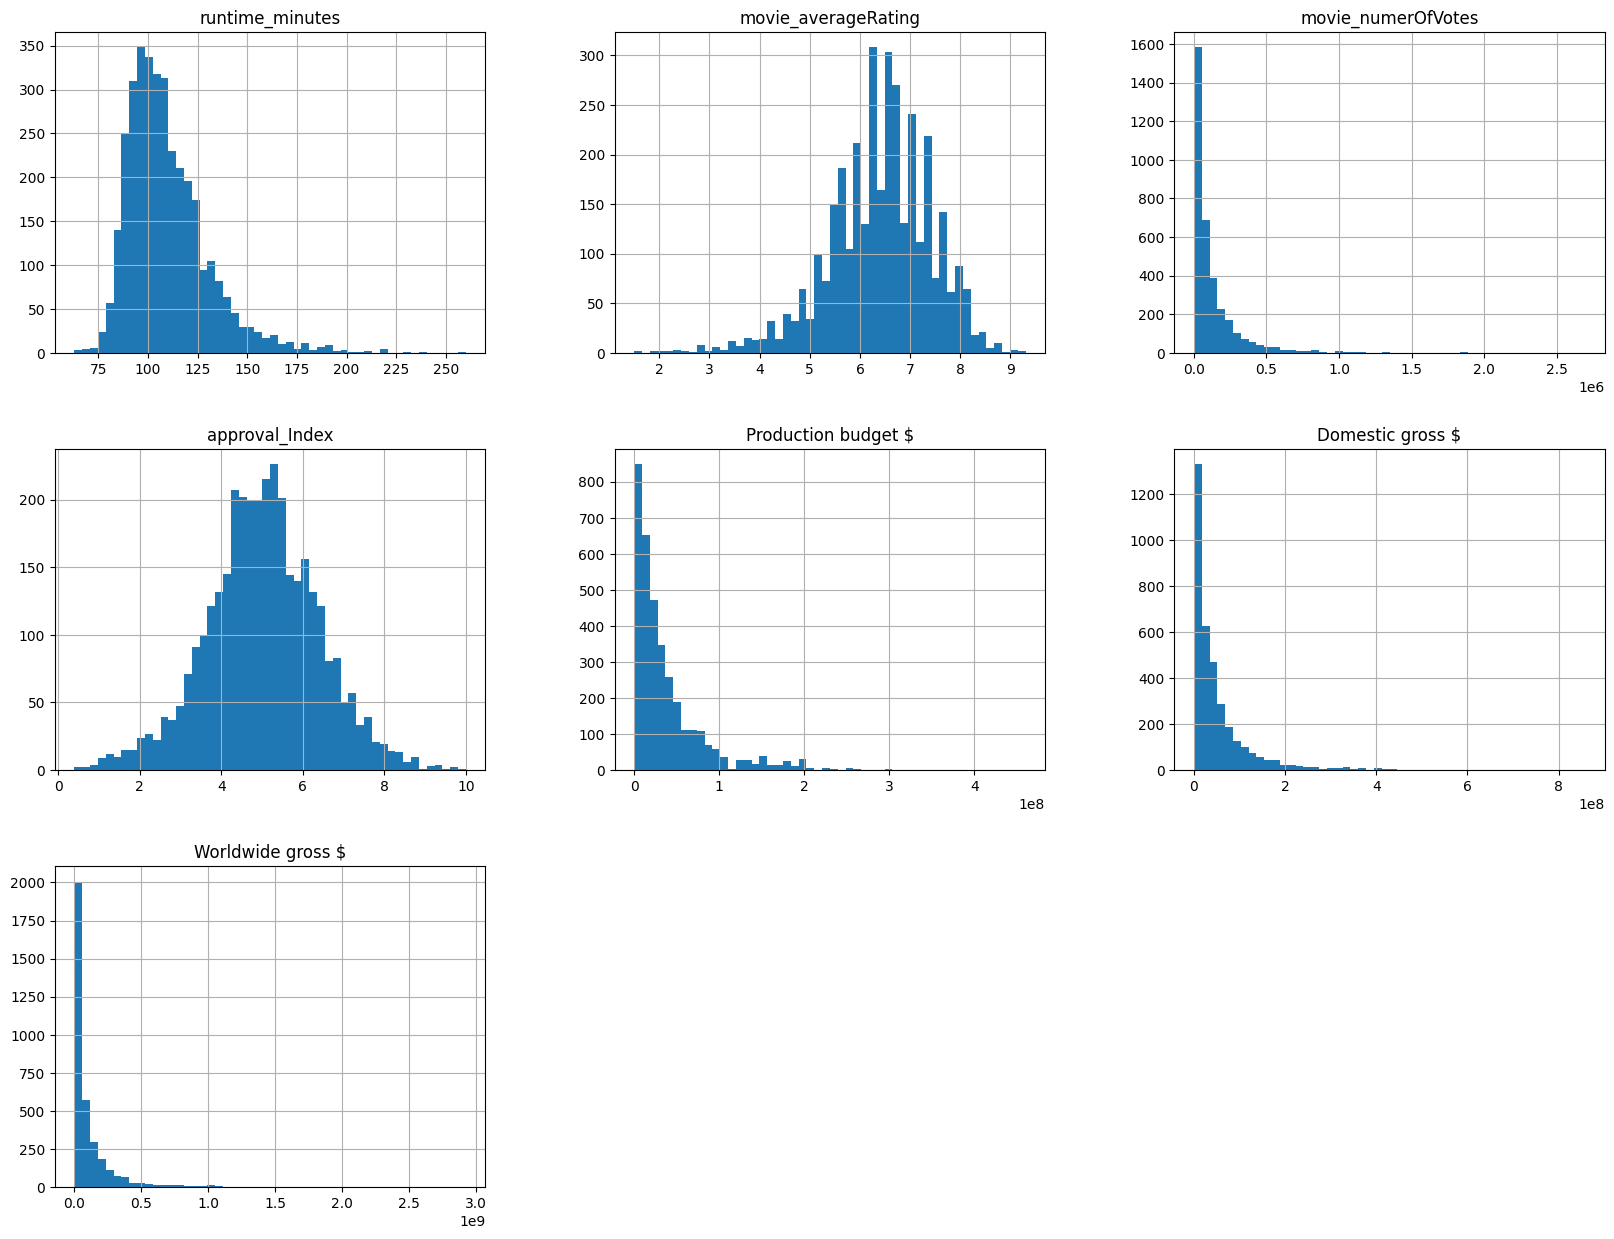

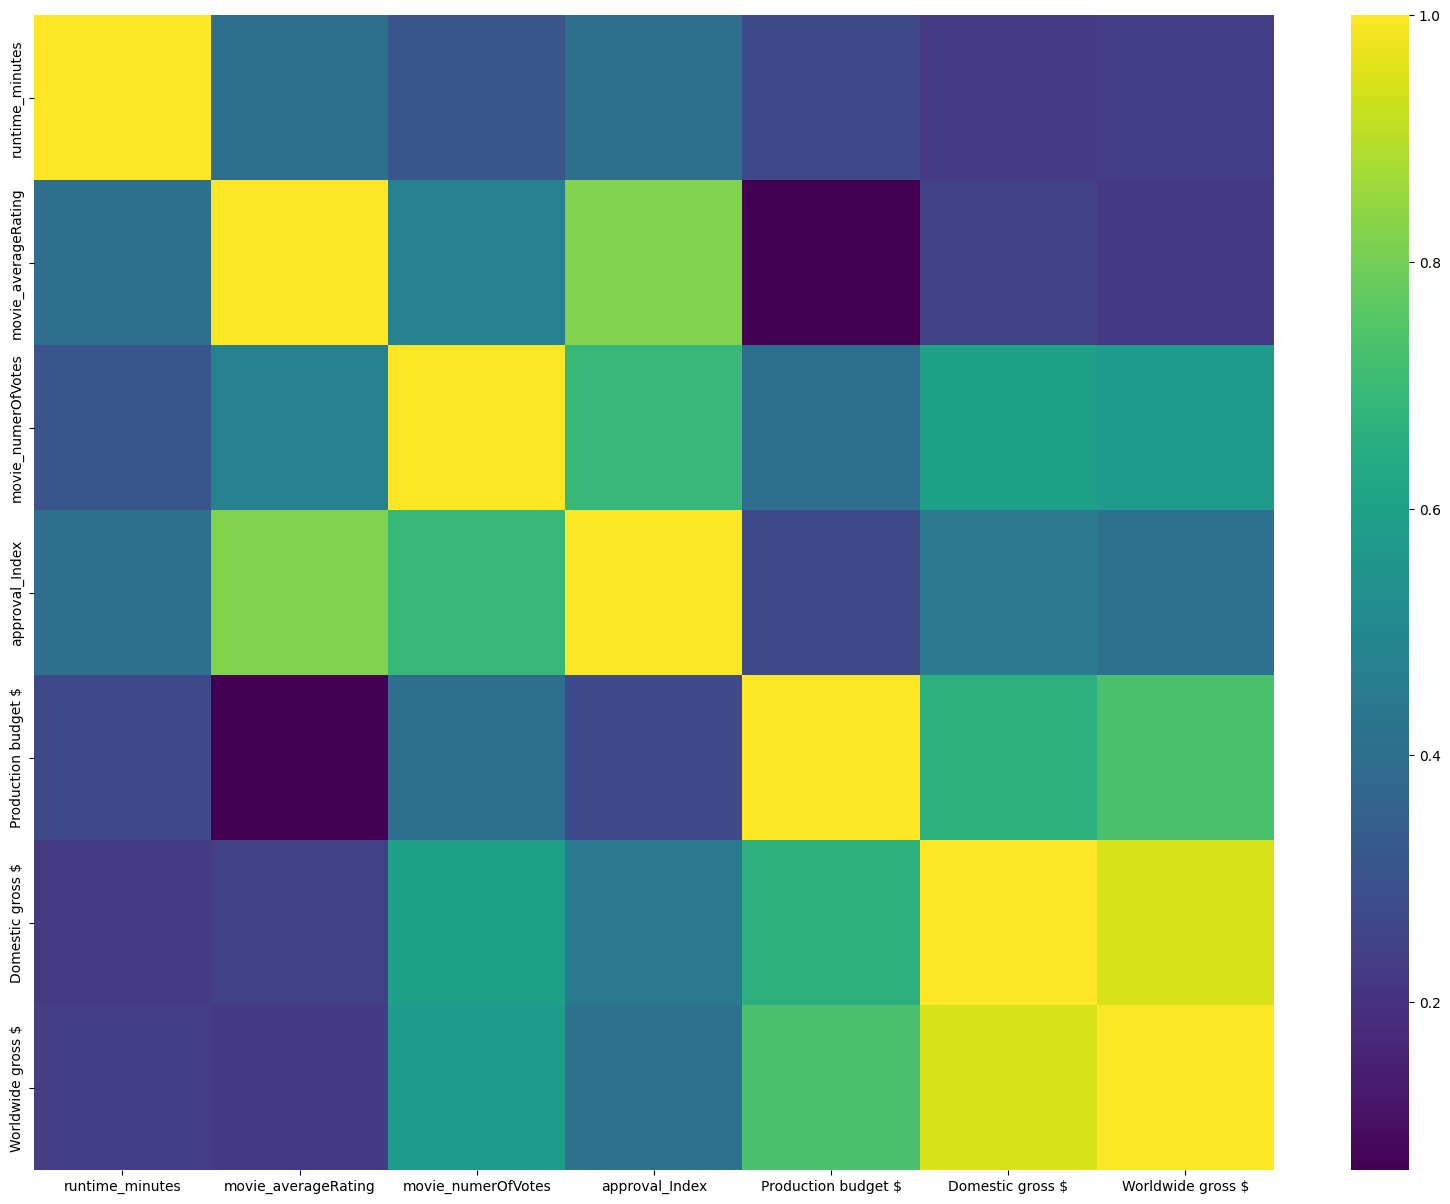

korelacje z Worldwide gross $


Worldwide gross $      1.000000
Domestic gross $       0.943244
Production budget $    0.732187
movie_numerOfVotes     0.572210
approval_Index         0.408324
runtime_minutes        0.234767
movie_averageRating    0.219798
Name: Worldwide gross $, dtype: float64

In [112]:
df.describe()

#DLA DANYCH NUMERYCZNYCH ZBADAĆ ICH ROZKŁAD
df[num_columns].hist(bins=50, figsize=(20,15))
plt.show()

#ZNALEZIENIE KORELACJI MIĘDZY KOLUMNAMI
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, fmt=".2f", cmap='viridis')
plt.show()

#SORTOWANIE KORELACJI DLA DANEJ KOLUMNY
print("korelacje z Worldwide gross $")
corr_matrix["Worldwide gross $"].sort_values(ascending=False)

Rodzielenie gatunków - duplikowanie

In [113]:
# rozdzielmy gatunki
df_expanded = df.drop('genres', axis=1).join(df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df_expanded.head()

,movie_title,production_date,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,genres
0,Kansas City,1996-08-16,116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824,Crime
0,Kansas City,1996-08-16,116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824,Drama
0,Kansas City,1996-08-16,116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824,Music
1,Sommersby,1993-02-05,114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992,Drama
1,Sommersby,1993-02-05,114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992,Mystery


In [114]:
# sprawdzmy po ile mamy filmów z 1,2,3 gatunkami:
genres_per_film = df_expanded["movie_title"].value_counts()
for wystapienie in range(1,10):
    print(f"wystepujace {wystapienie}: ", (genres_per_film == wystapienie).sum())

wystepujace 1:  285
wystepujace 2:  810
wystepujace 3:  2240
wystepujace 4:  24
wystepujace 5:  16
wystepujace 6:  34
wystepujace 7:  3
wystepujace 8:  0
wystepujace 9:  1


Drama          1784
Comedy         1347
Action          946
Adventure       743
Crime           629
Romance         596
Thriller        530
Horror          366
Mystery         323
Sci-Fi          296
Biography       274
Fantasy         266
Family          216
Animation       191
Music           121
History         121
Sport            90
War              65
Documentary      49
Musical          41
Western          34
Film-Noir         6
News              1
Name: genres, dtype: int64


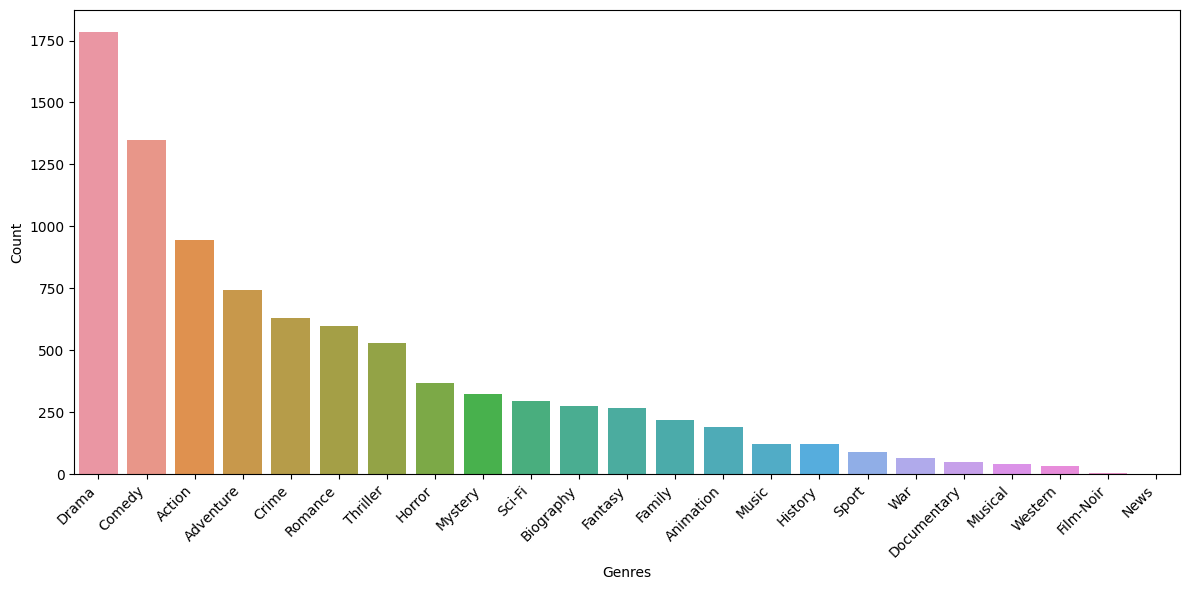

In [123]:

print(df_expanded['genres'].value_counts())

plt.figure(figsize=(12, 6))
countplot = sns.countplot(data=df_expanded, x='genres', order=df_expanded['genres'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Rozdzielenie genres - one hot encoding

In [116]:
# One-hot encode the genres

genres_one_hot = df['genres'].str.get_dummies(sep=',')

# Concatenate the original DataFrame with the new one-hot encoded genres
df = pd.concat([df, genres_one_hot], axis=1)

# Drop the original 'genres' column if it's no longer needed
df.drop('genres', axis=1, inplace=True)

df.head()

,movie_title,production_date,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Kansas City,1996-08-16,116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,...,1,0,0,0,0,0,0,0,0,0
1,Sommersby,1993-02-05,114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,...,0,0,1,0,1,0,0,0,0,0
2,We Bought a Zoo,2011-12-23,124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,...,0,0,0,0,0,0,0,0,0,0
3,The Spy Who Loved Me,1977-07-13,125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,...,0,0,0,0,0,0,0,1,0,0
4,Next Friday,2000-01-12,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,...,0,0,0,0,0,0,0,0,0,0


Zakodowanie director_professions liczbą profesji

wystepujace 1:  254
wystepujace 2:  43
wystepujace 3:  3031
wystepujace 4:  18
wystepujace 5:  2
wystepujace 6:  60
wystepujace 7:  0
wystepujace 8:  0
wystepujace 9:  5


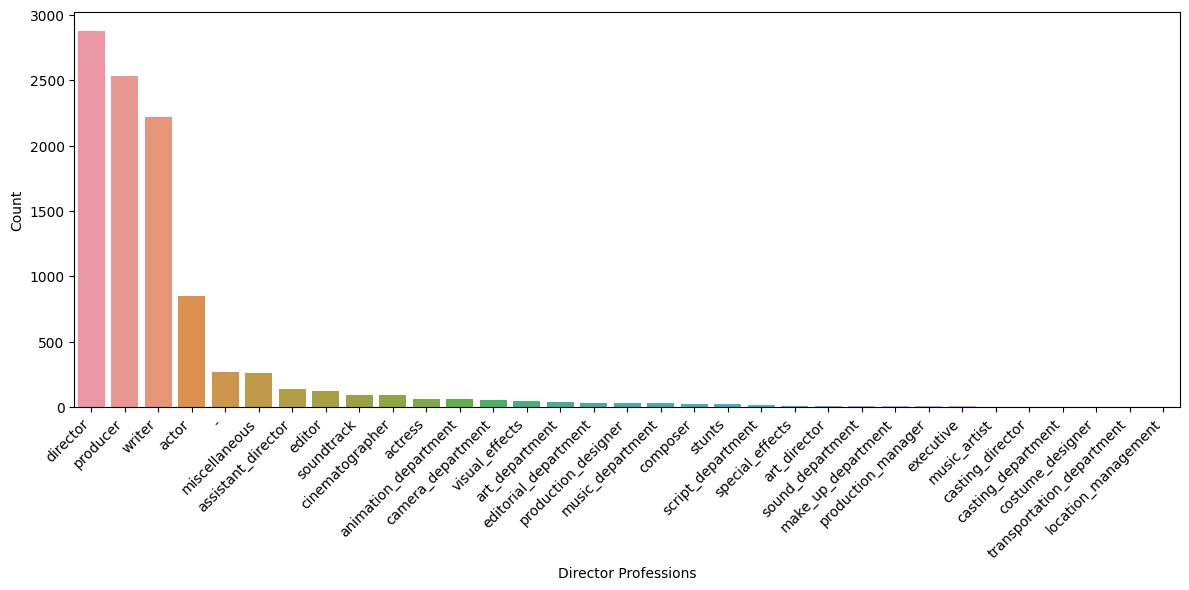

,movie_title,production_date,runtime_minutes,director_name,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,number_of_professions
0,Kansas City,1996-08-16,116.0,Robert Altman,1925,2006,6.3,5077.0,3.823171,19000000,...,0,0,0,0,0,0,0,0,0,3
1,Sommersby,1993-02-05,114.0,Jon Amiel,1948,alive,6.2,22262.0,4.434679,30000000,...,0,1,0,1,0,0,0,0,0,3
2,We Bought a Zoo,2011-12-23,124.0,Cameron Crowe,1957,alive,7.1,145614.0,6.078636,50000000,...,0,0,0,0,0,0,0,0,0,3
3,The Spy Who Loved Me,1977-07-13,125.0,Lewis Gilbert,1920,2018,7.0,110757.0,5.850243,14000000,...,0,0,0,0,0,0,1,0,0,3
4,Next Friday,2000-01-12,98.0,Steve Carr,\N,alive,6.1,41748.0,4.643223,9500000,...,0,0,0,0,0,0,0,0,0,2


In [117]:
# rozdzielmy gatunki
df_roboczy = df.drop('director_professions', axis=1).join(df['director_professions'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('director_professions'))
# sprawdzmy po ile mamy filmów z 1,2,3 gatunkami:
professions_per_film = df_roboczy["movie_title"].value_counts()
for wystapienie in range(1,10):
    print(f"wystepujace {wystapienie}: ", (professions_per_film == wystapienie).sum())

plt.figure(figsize=(12, 6))
countplot = sns.countplot(data=df_roboczy, x='director_professions', order = df_roboczy['director_professions'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Director Professions')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

df['number_of_professions'] = df['director_professions'].apply(lambda x: len(x.split(',')))
df.drop('director_professions', axis=1, inplace=True)
df.head()

Rozdzielenie dat: (chyba finalnie wystarczy sam rok zostawić)

In [118]:

df["production_year"] = df["production_date"].str.split("-").str[0].astype(int)
df["production_month"] = df["production_date"].str.split("-").str[1].astype(int)
df["production_day"] = df["production_date"].str.split("-").str[2].astype(int)

df = df.drop('production_date', axis=1)
df.head()

,movie_title,runtime_minutes,director_name,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,...,Romance,Sci-Fi,Sport,Thriller,War,Western,number_of_professions,production_year,production_month,production_day
0,Kansas City,116.0,Robert Altman,1925,2006,6.3,5077.0,3.823171,19000000,1353824,...,0,0,0,0,0,0,3,1996,8,16
1,Sommersby,114.0,Jon Amiel,1948,alive,6.2,22262.0,4.434679,30000000,50081992,...,1,0,0,0,0,0,3,1993,2,5
2,We Bought a Zoo,124.0,Cameron Crowe,1957,alive,7.1,145614.0,6.078636,50000000,75624550,...,0,0,0,0,0,0,3,2011,12,23
3,The Spy Who Loved Me,125.0,Lewis Gilbert,1920,2018,7.0,110757.0,5.850243,14000000,46800000,...,0,0,0,1,0,0,3,1977,7,13
4,Next Friday,98.0,Steve Carr,\N,alive,6.1,41748.0,4.643223,9500000,57176582,...,0,0,0,0,0,0,2,2000,1,12


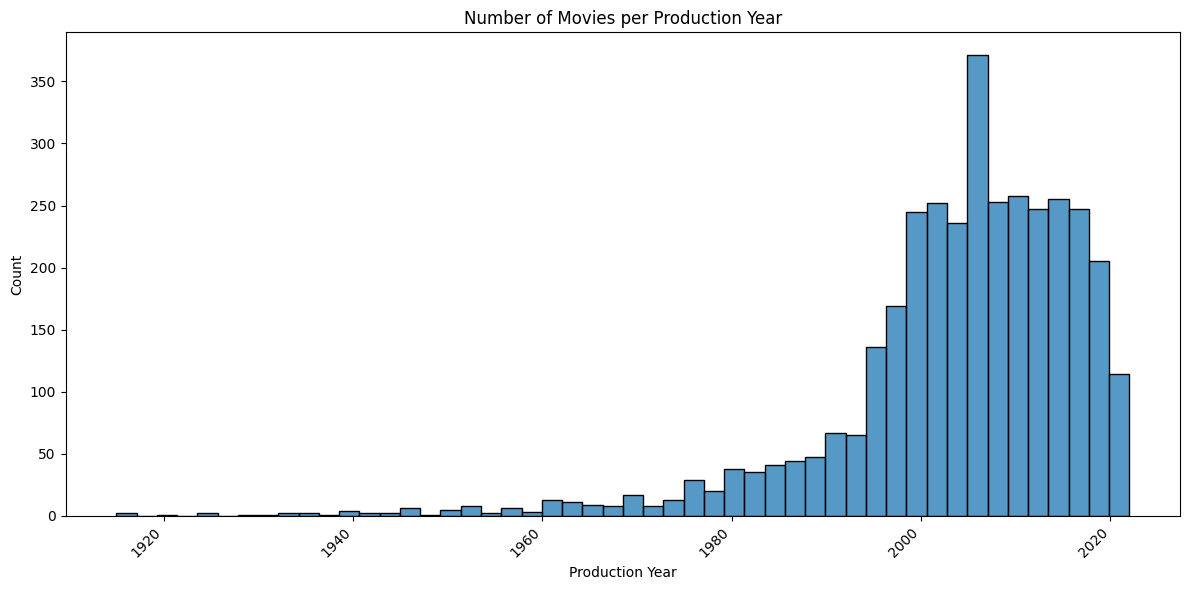

In [119]:
plt.figure(figsize=(12, 6))
histplot = sns.histplot(data=df, x='production_year', bins=50)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Production Year')
plt.title('Number of Movies per Production Year')
plt.tight_layout()
plt.show()

In [121]:
df.director_name.value_counts().head(20)

-                    265
Steven Spielberg      21
Clint Eastwood        19
Martin Scorsese       18
Ridley Scott          17
Woody Allen           17
Steven Soderbergh     14
Michael Bay           12
Oliver Stone          12
Spike Lee             12
Tim Burton            12
Brian De Palma        11
Renny Harlin          11
Ron Howard            11
Tony Scott            11
Robert Zemeckis       11
Richard Donner        10
Joel Schumacher       10
F. Gary Gray           9
Barry Levinson         9
Name: director_name, dtype: int64

sporo braków, nie wiem za bardzo jak zakodować sensownie te imiona